# <font color=red>DATA ANALYSIS</font>

In the previous notebooks, we have built a dataframe containing a total of 404.781 music releases and their author's origin, as well as the main music genre they belong to.

The purpose of this notebook is to simply analyze and explore the dataframe and see if there is any relevant insight before feeding it to our visualization tool (in this case, Tableau Public).

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data_out/Final_dataframe.csv', sep='\t', header=0, encoding='utf-8')
df.head()

/home/ainhoa/anaconda3/envs/kschool/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Main_genre,area_id,area_name,artist_id,artist_mbid,artist_name,country_name,credit_id,group_id,latitude,longitude,release_group,release_id,release_year,subdivision_name,subgenre,count,Year
0,Electronic,NaN,Bristol,4.0,10adbe5e-a2c0-4bf3-8249-2b4cbf6e6ca8,Massive Attack,United Kingdom,4,4,52.355518,-1.174320,Blue Lines,7716,1991-01-01,England,NaN,1,1991
1,Rock,NaN,Tucson,12.0,249eb550-505e-43ef-ac50-e8c605706ff1,Giant Sand,United States,12,12,34.048928,-111.093731,Chore of Enchantment,10018,2000-01-01,Arizona,NaN,1,2000
2,Jazz,NaN,Chapel Hill,11.0,31810c40-932a-4f2d-8cfd-17849844e2a6,Squirrel Nut Zippers,United States,11,13,35.759573,-79.019300,The Inevitable,63822,1995-01-01,North Carolina,NaN,1,1995
3,Electronic,NaN,London,20.0,be899560-1570-402e-9f95-3182898a8b70,Art of Noise,United Kingdom,20,21,52.355518,-1.174320,"The Best of the Art of Noise: Art Works 12""",63500,1988-01-01,England,NaN,1,1988
4,Rock,NaN,Los Angeles,38.0,1dcc8968-f2cd-441c-beda-6270f70f2863,Hole,United States,38,50,36.778261,-119.417932,Live Through This,1292635,1994-01-01,California,NaN,1,1994


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404781 entries, 0 to 404780
Data columns (total 18 columns):
Main_genre          404781 non-null object
area_id             28041 non-null float64
area_name           391903 non-null object
artist_id           404781 non-null float64
artist_mbid         370261 non-null object
artist_name         404781 non-null object
country_name        404781 non-null object
credit_id           404781 non-null int64
group_id            404781 non-null int64
latitude            404781 non-null float64
longitude           404781 non-null float64
release_group       404781 non-null object
release_id          404781 non-null int64
release_year        404781 non-null object
subdivision_name    398275 non-null object
subgenre            51910 non-null object
count               404781 non-null int64
Year                404781 non-null int64
dtypes: float64(4), int64(5), object(9)
memory usage: 55.6+ MB


In [4]:
#If we group by Main genre:
genre_grouped = pd.pivot_table(df,values='count',\
                                index=['Main_genre'], aggfunc=np.sum)
genre_grouped.reset_index(level=['Main_genre'], inplace=True)
genre_grouped.head()

,Main_genre,count
0,Blues,8577
1,Classical,29966
2,Country,11050
3,Electronic,59295
4,Folk,11045


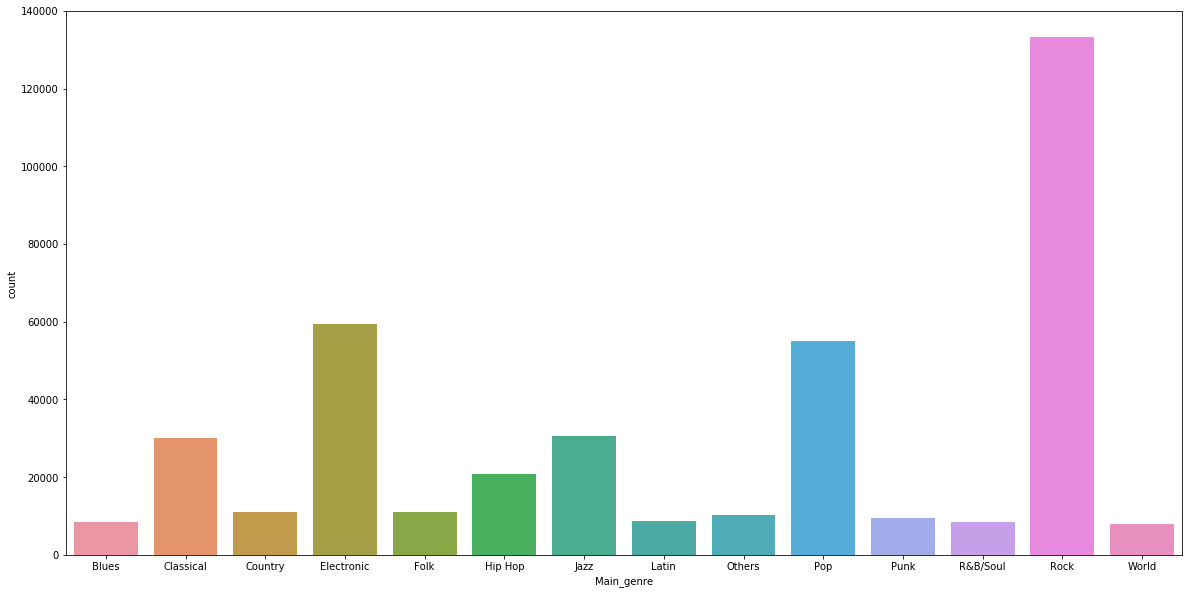

In [5]:
#Let's visualize how many releases we have for each genre:
plt.figure(figsize=(20,10))
sns.barplot(x=genre_grouped['Main_genre'], y=genre_grouped['count'])

We can see that Rock is the top category/Main genre, followed by Electronic and Pop. This result seems to me quite accurate, if we think that the releases we are taking into consideration are only recorded music.

The raising of recorded music was around 1948 (when the first Record/LP was issued), which is also the same period Rock music started. Before that, recorded music was not very common.

Let's analyze now the evolution of the different genres in time:

In [6]:
#We group by year and Main genre:
year_grouped = pd.pivot_table(df,values='count',\
                                index=['Year','Main_genre'], aggfunc=np.sum)
year_grouped.reset_index(level=['Year','Main_genre'], inplace=True)

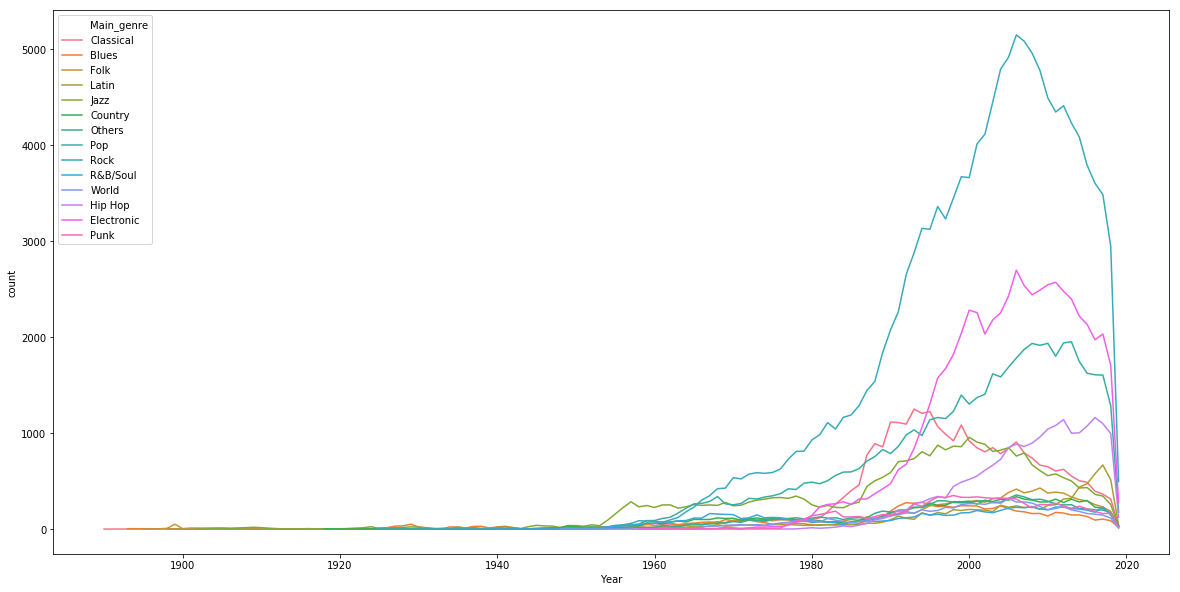

In [7]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=year_grouped['Year'], \
                  y=year_grouped['count'], hue=year_grouped['Main_genre'])

It seems that the evolution is quite similar for the majority of genres, and that there is quite a negative trend from the mid-2000's: this could be caused by the replacement of recorded music by mp3 and streaming. 

I will add more detail about the chronological events related to the different formats of recorded music in the final visualization product in Tableau.

Also, it's very likely that Musicbrainz's database isn't up-to-date for the latest releases, so we probably lack of all the information.

Let's have a look now and see how the releases are divided by country:

In [8]:
#We group by country:
country_grouped = pd.pivot_table(df,values='count',\
                                index=['country_name'], aggfunc=np.sum)
country_grouped.reset_index(level=['country_name'], inplace=True)

In [11]:
#As we have many countries, we want to see only the first 20 producers:
country_grouped.sort_values(by='count', ascending=False, inplace=True)
top_20 = country_grouped.head(20)

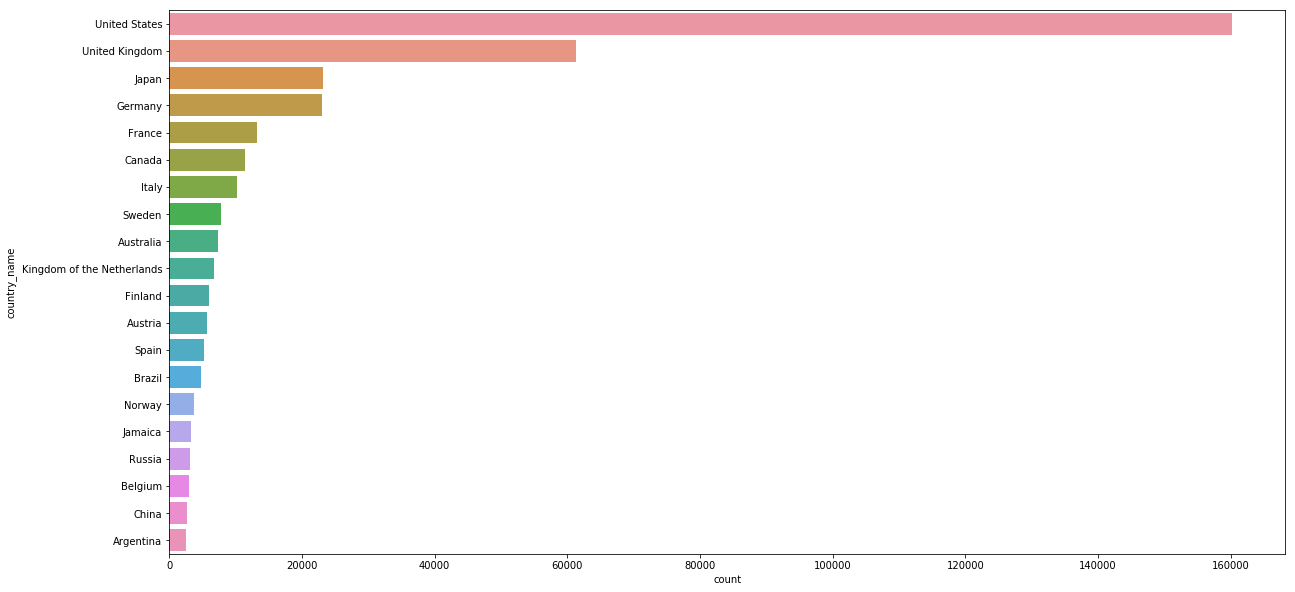

In [12]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='count', y='country_name', data=top_20)

The above results are not surprising, as the majority of the bands or artists are from the USA or UK.

Also, Musicbraiz is part of the NGO MetaBrainz, which is based in the USA. It's therefore logical that the majority of their records are related to american or british artists/bands.

We still have enough data from the rest of the countries to populate our visualization.